# Implemrnting Logistic Regression from Scratch

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

## Function Implementation

In [3]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def add_const(X: pd.DataFrame):
    X['const'] = 1
    return X

def predict(parameters, X):
    y_pred = sigmoid(np.dot(X, parameters))
    return y_pred

def LL(model, parameters):
    y_pred = sigmoid(np.dot(model.X, parameters))
    log_l = model.Y * np.log(y_pred) + (1 - model.Y) * np.log(1 - y_pred)
    return np.sum(log_l)

def gradient_descent(model, n_iter, learning_rate):
    parameters = np.array(model.params)
    LL_record = np.ones(n_iter)
    for i in range(n_iter):
        Y_pred = sigmoid(np.dot(model.X, parameters))
        gradient = np.dot(model.X.T, (model.Y - Y_pred))
        parameters += learning_rate * gradient
        LL_record[i] = LL(model, parameters)
    return parameters, LL_record

class Logistic_Reg():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.params = np.zeros((X.shape[1]), dtype=float)
        # self.params = np.random.normal(size=X.shape[1], scale=0.1)
        
        # from sklearn.linear_model import LogisticRegression
        # model_sk = LogisticRegression().fit(X[:,:-1], Y)
        # self.params = np.append(model_sk.coef_, model_sk.intercept_)

    def fit(self, n_iter=10000, learning_rate=0.0000001):
        # n_iter = 10000
        # learning_rate = 0.0000001
        # learning_rate = 0.0000003
        self.params, LL_record = gradient_descent(self, n_iter, learning_rate)
        return self, LL_record

    def pred(self):
        Y_pred = predict(self.params, self.X)
        return Y_pred

In [4]:
#log_l = model.Y * y_pred - np.log(1 + np.exp(y_pred))
# n_iter = 10k, lr = 0.0000001

Load Data

In [5]:
# dat_dir = './'

github_url = 'https://raw.githubusercontent.com/huangyh09/foundation-data-science/'
dat_dir = github_url + 'main/assignments/'

df_lr = pd.read_csv(dat_dir + "stroke_data.csv", index_col=0)

In [6]:
df_lr.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,stroke
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,0
70031,1,71.0,1,0,1,1,195.25,33.3,0,0
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,0
38078,1,82.0,1,1,1,0,73.19,33.5,0,0


In [7]:
X = df_lr[df_lr.columns[:-1]]
Y = df_lr[df_lr.columns[-1]]

In [8]:
print(np.dot(X.T, Y))
print(np.dot(X.iloc[:, 1].T, Y))

[  105.   12250.      57.      36.     160.      86.   24618.62  5517.3
    39.  ]
12250.0


In [9]:
X = add_const(X)
model_t = Logistic_Reg(X.values, Y.values)
X.head()

,is_female,age,hypertension,heart_disease,ever_married,Rural_residence,avg_glucose_level,bmi,smoking,const
id,,,,,,,,,,
24201,0,33.0,0,0,1,1,93.80,23.9,0,1
70031,1,71.0,1,0,1,1,195.25,33.3,0,1
17013,0,78.0,1,0,0,0,113.01,24.0,0,1
67890,0,77.0,0,1,1,0,102.96,20.9,0,1
38078,1,82.0,1,1,1,0,73.19,33.5,0,1


In [10]:
# model_t, log_likelihood_record = model_t.fit(n_iter=1000, learning_rate=0.0000001)
# model_t, log_likelihood_record = model_t.fit(n_iter=1000, learning_rate=0.0000003)
model_t, log_likelihood_record = model_t.fit(n_iter=5000000, learning_rate=0.0000007)


print(model_t.params)
print(log_likelihood_record[:10], log_likelihood_record[-10:])

In [ ]:
write_path = 'write'

In [ ]:
# plot log_likelihood_record and LL_sk
LL_sk = - 357.35
plt.scatter(np.arange(5000000), log_likelihood_record)
plt.axhline(y=LL_sk, color='r', linestyle='-')
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('Log Likelihood vs. Iteration')
plt.legend(['Log likelihood record', 'Log likelihood of sklearn'])
plt.savefig(write_path + '/LL_large_iter.png')
plt.show()

In [ ]:
print(model_t.pred())

[0.01783447 0.48342463 0.54079132 0.40978198 0.62808265 0.01856381
 0.00573341 0.00907665 0.46641391 0.48881732 0.01795489 0.21178687
 0.48691831 0.46384588 0.13728787 0.16885928 0.22332981 0.18418955
 0.04512916 0.09526621 0.46075025 0.4338348  0.11782601 0.03349707
 0.0195629  0.30194473 0.0716678  0.06885409 0.02215273 0.04783937
 0.03958368 0.18941037 0.08655488 0.44417628 0.43768649 0.01491364
 0.15461194 0.29036032 0.66216108 0.24660215 0.10981435 0.51447224
 0.07518209 0.08343044 0.41541765 0.47016751 0.0808972  0.02289212
 0.10942685 0.49592244 0.01143538 0.29376933 0.20767839 0.57411842
 0.01331266 0.11709967 0.09336462 0.01526657 0.02240919 0.05490483
 0.02018384 0.0335058  0.63323783 0.24803376 0.48194747 0.66419044
 0.18841085 0.42370501 0.21274979 0.01386803 0.78142169 0.23481475
 0.48288582 0.05048252 0.01317428 0.29302821 0.2491957  0.25635393
 0.02858439 0.05726602 0.03705186 0.01469427 0.03997544 0.00944537
 0.40976316 0.02386838 0.04019457 0.00463511 0.59112617 0.4740

## sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X.values[:,:-1], Y)
print(model_sk.coef_)
print(model_t.params)

[[ 0.1008424   0.07685112  0.37187955  0.28116361 -0.30954422  0.01959607
   0.00456281  0.00899352  0.51157971]]
[ 1.21341814e-01  7.59123505e-02  4.02131591e-01  3.14248086e-01
 -2.91550109e-01  2.31316465e-02  4.40507186e-03  9.28338747e-03
  5.29411258e-01 -6.88038468e+00]


/home/yuanhua/anaconda3/envs/torchEnv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred_sk = pd.DataFrame(data=model_sk.predict_proba(X.values[:, :-1])[:, 1])
log_likelihood_sk = np.dot(Y, np.log(Y_pred_sk)) + np.dot((1 - Y), np.log(1 - Y_pred_sk))
print(log_likelihood_sk)
print(model_sk.score(X.values[:, :-1], Y))

[-357.38545267]
0.823469387755102


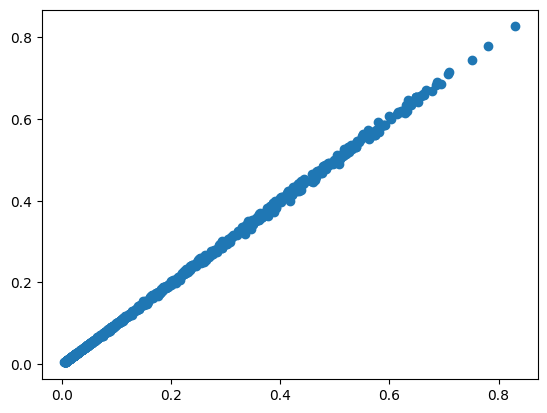

In [ ]:
plt.scatter(model_t.pred(), Y_pred_sk)